<a href="https://colab.research.google.com/github/psykeefuego/DS---ML/blob/main/K-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07/03/24

**K-Nearest Neighbors**

on drug classification dataset

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
data=pd.read_csv('drug.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


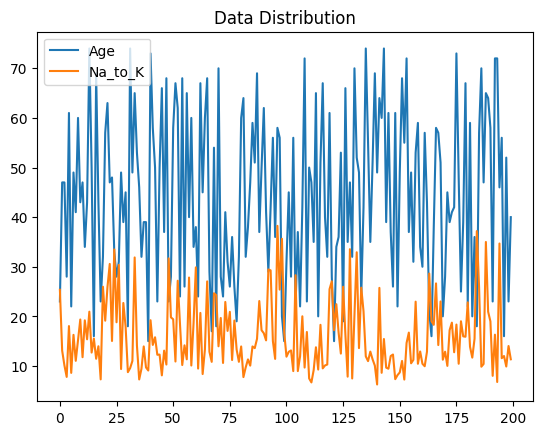

In [ ]:
data.plot()
plt.title('Data Distribution')
plt.show()

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<ipython-input-16-7f49ad9f40b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),cmap='YlGnBu')


<Axes: >

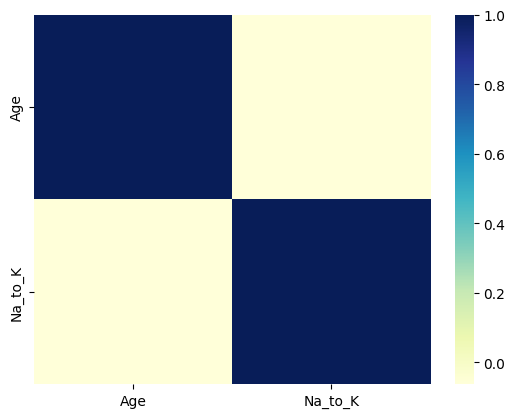

In [ ]:
sb.heatmap(data.corr(),cmap='YlGnBu')

In [ ]:
data.shape

(200, 6)

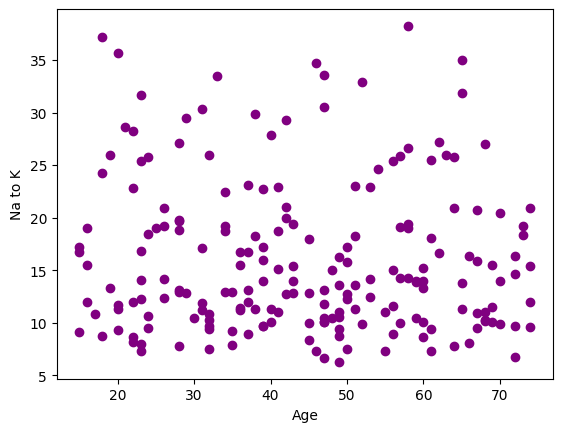

In [ ]:
plt.scatter(data.Age,data.Na_to_K,c='purple')
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.show()

In [ ]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**Encoding by replacement**

In [ ]:
gender = {'M':0, 'F':1}
bp = {'HIGH':0,'LOW':1, 'NORMAL':2}
chol = {'HIGH':0, 'NORMAL':1}

In [ ]:
data['BP'].replace(bp,inplace=True)
data['Cholesterol'].replace(chol,inplace=True)
data['Sex'].replace(gender,inplace=True)

In [ ]:
data.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

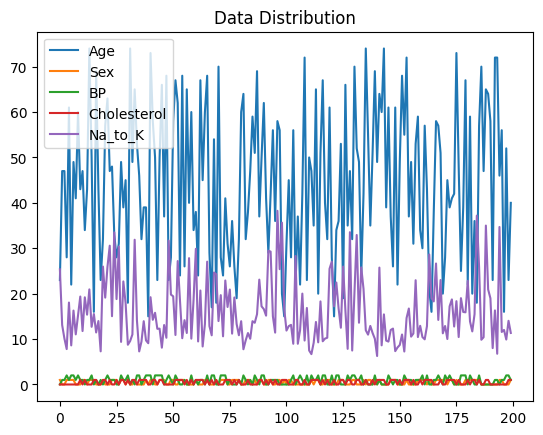

In [ ]:
data.plot()
plt.title('Data Distribution')
plt.show()

In [ ]:
X=data.drop('Drug',axis=1)
y=data.Drug

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

In [ ]:
model =  KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7


In [ ]:
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

       drugA       0.33      0.75      0.46         4
       drugB       0.50      0.75      0.60         4
       drugC       0.33      0.50      0.40         2
       drugX       0.83      0.36      0.50        14
       drugY       1.00      1.00      1.00        16

    accuracy                           0.70        40
   macro avg       0.60      0.67      0.59        40
weighted avg       0.79      0.70      0.70        40



In [ ]:
print('Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[ 3,  0,  1,  0,  0],
       [ 0,  3,  0,  1,  0],
       [ 0,  1,  1,  0,  0],
       [ 6,  2,  1,  5,  0],
       [ 0,  0,  0,  0, 16]])

In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
import plotly.express as px
fig = px.scatter(data, x="Age", y="Sex", color="Drug",
                 size='BP', hover_data=['Cholesterol'])
fig.show()



---



**Titanic Dataset**

In [ ]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.drop(['Ticket','Name','Cabin'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


In [ ]:
gender={'male':0, 'female':1}
emb={'C':1,'S':2,'Q':3}
df.Sex.replace(gender,inplace=True)
df.Embarked.replace(emb,inplace=True)
#complete 2 more datasets
#one dataset, do prerocessing

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object



---

